lst_nda_2DXX_imgPred_asignacionIn2_unique:  [1]
nda_2DXX_imgMaskInIn2_ElementosOnly: 
 [[ True False False  True]
 [ True False False  True]
 [ True False False  True]
 [False  True False  True]]
nda_2DXX_imgPred_asignacionIn2_currentAsignacion: 
 [[False False False  True]
 [False False  True False]
 [False False  True False]
 [False False False  True]]
nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly: 
 [[False False False  True]
 [False False False False]
 [False False False False]
 [False False False  True]]
nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[0]:  [False False False  True]
nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[-1]:  [False False False  True]
indices_CurrentAsignacion_mask_ElementsOnly_FirstRow: 
 (array([3]),)
indices_CurrentAsignacion_mask_ElementsOnly_LastRow: 
 (array([3]),)
lst_1D_elements__Mask_Asignacion_firstRow: 
 [[2]]
lst_1D_elements__Mask_Asignacion_lastRow: 
 [[2]]
type(lst_1D_elements__Mask_Asignacion_firs

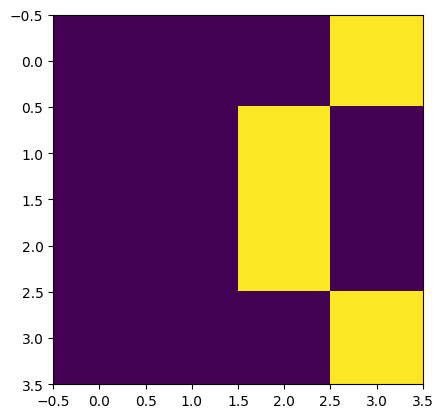

type(int_connected_objects_count_final):  <class 'int'>
int_connected_objects_count_final:  1


In [86]:
import numpy as np
import matplotlib.pyplot as plt

def func_count_connected_objects(nda_2DXX_imgPredIn, 
                                 nda_2DXX_imgMaskIn
                                ):
    
    
    
    def func_dfs(row, 
                 col, 
                 boo_str_MaskoPred,
                 int_asignacion=0):
        """
        Function that performs iterative depth-first search.
        Modifies the matrices nda_2DXX_imgPredIn2 and nda_2DXX_imgPred_asignacion.
        """
        stack = [(row, col)]
        
        if(boo_str_MaskoPred=="nda_2DXX_imgPredIn2"):
            #print("entro")
            #return()
            while stack:
                r, c = stack.pop()


                if (r < 0 or r >= int_total_rows or c < 0 or c >= int_total_cols or
                    nda_2DXX_imgPredIn2[r, c] == 0):
                    continue

                # Mark the current cell as visited
                nda_2DXX_imgPredIn2[r, c] = 0
                nda_2DXX_imgPred_asignacion[r, c] = int_asignacion



                # Add neighboring cells to the stack
                stack.append((r + 1, c))  # Down
                stack.append((r - 1, c))  # Up
                stack.append((r, c + 1))  # Right
                stack.append((r, c - 1))  # Left

                # Diagonals
                stack.append((r + 1, c + 1))  # Bottom-right
                stack.append((r + 1, c - 1))  # Bottom-left
                stack.append((r - 1, c + 1))  # Top-right
                stack.append((r - 1, c - 1))  # Top-left

            
        if(boo_str_MaskoPred=="nda_2DXX_imgMaskIn3"):
            
            while stack:
                r, c = stack.pop()


                if (r < 0 or r >= int_total_rows or c < 0 or c >= int_total_cols or
                    nda_2DXX_imgMaskIn3[r, c] == 0):
                    continue

                # Mark the current cell as visited
                nda_2DXX_imgMaskIn3[r, c] = 0
                nda_2DXX_Mask_asignacion[r, c] = int_asignacion

                # Add neighboring cells to the stack
                stack.append((r + 1, c))  # Down
                stack.append((r - 1, c))  # Up
                stack.append((r, c + 1))  # Right
                stack.append((r, c - 1))  # Left

                # Diagonals
                stack.append((r + 1, c + 1))  # Bottom-right
                stack.append((r + 1, c - 1))  # Bottom-left
                stack.append((r - 1, c + 1))  # Top-right
                stack.append((r - 1, c - 1))  # Top-left

                
        
        #print("hola")
    
    #AQUI HAY QUE VER QUE ATRAVIESAN DE ARRIBA A ABAJO

    
    def func_conectividadPrimeraUltimaFila(nda_2DXX_imgPredIn):
        """
        Revisa si el mismo valor esta en la primera y ultima fila y como los elementos son continuos 
        solo deja los elementos que recorren la discontinuidad de lado a lado los demas quedan en 0
        """
        nda_2DXX_imgPredOut=nda_2DXX_imgPredIn.copy()
        lst_int_nda2DXX_array=np.unique(nda_2DXX_imgPredOut)
        lst_int_nda2DXX_array = lst_int_nda2DXX_array[lst_int_nda2DXX_array != 0]#Saco 0 que es fondo

        for lst_int_nda2DXX_array_i in lst_int_nda2DXX_array:
            nda_2DXX_imgPred_aux=nda_2DXX_imgPredOut.copy()

            nda_2DXX_imgPred_aux[nda_2DXX_imgPred_aux!=lst_int_nda2DXX_array_i]=0#Se analiza solo el valor actual. Todos los valores distintos seran cero

            # Check if there is at least one 1 in the first row
            has_value_in_first_row = np.any(nda_2DXX_imgPred_aux[0] == lst_int_nda2DXX_array_i)#Que el valor actual este en la primera fila

            # Check if there is at least one 1 in the last row
            has_value_in_last_row = np.any(nda_2DXX_imgPred_aux[-1] == lst_int_nda2DXX_array_i)#Que el valor actual este en la ultima fila

            # Check if both conditions are satisfied simultaneously
            both_conditions_satisfied = has_value_in_first_row and has_value_in_last_row

            #print(both_conditions_satisfied)
            if(both_conditions_satisfied==False):#Si no esta el elemento en la primera y ultima fila se borra el elemento y se deja en 0
                nda_2DXX_imgPredOut[nda_2DXX_imgPredOut==lst_int_nda2DXX_array_i]=0

        return(nda_2DXX_imgPredOut)
    
    
    def func_contarCantidadElementos(nda_2DXX_Mask_asignacionIn,                                     
                                     nda_2DXX_imgPred_asignacionIn,
                                     nda_2DXX_imgMaskInIn):
        """
        Cuenta cuantos elementos hay y tambien quita elementos que no cumplen con estar con un pixel en el ground truth en la parte de arriba y en la de abajo
        En una lista obtiene los distintos valores de nda_2DXX_imgPred_asignacionIn
        Solo valen los elementos distintos cuando estan presentes en la clase objeto en la mascara
        
        Actualizacion
        nda_2DXX_imgPred_asignacionIn analiza elemento por elemento, deja a un elemento en 1 y todo lo demas en 0
        nda_2DXX_imgPred_asignacionIn se dejan todos los elementos en 1 y el fondo en 0
        Se intesectan estas dos operaciones anteriores... Queda el elemento analizado de pred intersectado con todos los elementos de mask que coincidan en sus posiciones
        Se toma la primera y ultima fila de esta interseccion en donde hay TRUES (es decir pred se intersecto con algun elemento de mask)
        Se toman los indices considerando primera y ultima fila de esta interseccion en donde hay TRUES
        Con estos indices se toman los numeros de nda_2DXX_imgPred_asignacionIn
        Si alguno de los numeros esta tanto en la primera columna como en la ultima, el elemento es valido, sino se borra
        
        """
        
        nda_2DXX_Mask_asignacionIn2=nda_2DXX_Mask_asignacionIn.copy()
        nda_2DXX_imgPred_asignacionIn2=nda_2DXX_imgPred_asignacionIn.copy()
        #nda_2DXX_imgMaskInIn2=nda_2DXX_imgMaskInIn.copy()
        
        if("obtener los valores unicos de pred excluyendo el cero en una lista"==
          "obtener los valores unicos de pred excluyendo el cero en una lista"):
            lst_nda_2DXX_imgPred_asignacionIn2_unique=np.unique(nda_2DXX_imgPred_asignacionIn2)
            lst_nda_2DXX_imgPred_asignacionIn2_unique = lst_nda_2DXX_imgPred_asignacionIn2_unique[lst_nda_2DXX_imgPred_asignacionIn2_unique != 0]

            #nda_2DXX_imgMaskInIn2_onesOnly=(nda_2DXX_imgMaskInIn2==1)#Solo vale cuando la clase objeto esta presente en la mascara
        
        if("obtener la posicion de todos los elementos de maskAsignacion excluyendo el cero"==
          "obtener la posicion de todos los elementos de maskAsignacion excluyendo el cero"):
            nda_2DXX_imgMaskInIn2_ElementosOnly=(nda_2DXX_Mask_asignacionIn2!=0)#Todos los elementos se consideran
        
        #print("nda_2DXX_imgMaskInIn2_onesOnly: ")
        #print(nda_2DXX_imgMaskInIn2_onesOnly)
        #print("################")
        #print("################")
        #print("################")
        for lst_nda_2DXX_imgPred_asignacionIn2_unique_i in lst_nda_2DXX_imgPred_asignacionIn2_unique:

            #print("lst_nda_2DXX_imgPred_asignacionIn2_unique_i: ",lst_nda_2DXX_imgPred_asignacionIn2_unique_i)
            if("Obtener las posiciones de un elemento por cada iteracion"==
              "Obtener las posiciones de un elemento por cada iteracion"):
                nda_2DXX_imgPred_asignacionIn2_currentAsignacion=(nda_2DXX_imgPred_asignacionIn2==lst_nda_2DXX_imgPred_asignacionIn2_unique_i)#Solo se selecciona un elemento
                #print("nda_2DXX_imgPred_asignacionIn2_currentAsignacion: ")
                #print(nda_2DXX_imgPred_asignacionIn2_currentAsignacion)

                #out=(matrix_aux_Out==matrix_aux_Mask)
            if("Hay interseccion entre elemento de pred y elementos de mask?"==
              "Hay interseccion entre elemento de pred y elementos de mask?"):
                nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly = np.logical_and(nda_2DXX_imgPred_asignacionIn2_currentAsignacion, nda_2DXX_imgMaskInIn2_ElementosOnly)#Se consideran todos los elementos de mask en principio
            
            if("se obtienen los indices de la primera y ultima fila"==
              "se obtienen los indices de la primera y ultima fila"):
                # Find indices of True values in the first row
                indices_CurrentAsignacion_mask_ElementsOnly_FirstRow = np.where(nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[0])
                indices_CurrentAsignacion_mask_ElementsOnly_LastRow = np.where(nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[-1])
            
            if("se hace una lista con los valores de Maskasignacion que corresponden a la interseccion entre Mask asignacion y Pred"==
              "se hace una lista con los valores de Maskasignacion que corresponden a la interseccion entre Mask asignacion y Pred"):
                # Extract corresponding elements from nda_2DXX_imgMaskInIn2_ElementosOnly
                nda_1D_elements__Mask_Asignacion_firstRow=nda_2DXX_Mask_asignacionIn2[0, indices_CurrentAsignacion_mask_ElementsOnly_FirstRow]
                nda_1D_elements__Mask_Asignacion_lastRow=nda_2DXX_Mask_asignacionIn2[-1, indices_CurrentAsignacion_mask_ElementsOnly_LastRow]
                
                lst_1D_elements__Mask_Asignacion_firstRow=nda_1D_elements__Mask_Asignacion_firstRow.tolist()
                lst_1D_elements__Mask_Asignacion_lastRow=nda_1D_elements__Mask_Asignacion_lastRow.tolist()
            
            boo_at_least_one_true=any(elem in lst_1D_elements__Mask_Asignacion_firstRow for elem in lst_1D_elements__Mask_Asignacion_lastRow)
            
            if(boo_at_least_one_true==False):#Si hay un elemento de mask que se repita en la primera y ultima fila entonces queda valido el elemento
                nda_2DXX_imgPred_asignacionIn2[nda_2DXX_imgPred_asignacionIn2==lst_nda_2DXX_imgPred_asignacionIn2_unique_i]=0
            
            if True:
                print("lst_nda_2DXX_imgPred_asignacionIn2_unique: ", lst_nda_2DXX_imgPred_asignacionIn2_unique)
                print("nda_2DXX_imgMaskInIn2_ElementosOnly: \n", nda_2DXX_imgMaskInIn2_ElementosOnly)
                print("nda_2DXX_imgPred_asignacionIn2_currentAsignacion: \n",nda_2DXX_imgPred_asignacionIn2_currentAsignacion)
                print("nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly: \n",nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly)

                print("nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[0]: ", nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[0])
                print("nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[-1]: ", nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[-1])
                print("indices_CurrentAsignacion_mask_ElementsOnly_FirstRow: \n", (indices_CurrentAsignacion_mask_ElementsOnly_FirstRow))
                print("indices_CurrentAsignacion_mask_ElementsOnly_LastRow: \n", (indices_CurrentAsignacion_mask_ElementsOnly_LastRow))
                print("lst_1D_elements__Mask_Asignacion_firstRow: \n", (lst_1D_elements__Mask_Asignacion_firstRow))
                print("lst_1D_elements__Mask_Asignacion_lastRow: \n", (lst_1D_elements__Mask_Asignacion_lastRow))
                print("type(lst_1D_elements__Mask_Asignacion_firstRow): \n", type(lst_1D_elements__Mask_Asignacion_firstRow))
                #print("nda_2DXX_imgMaskInIn2: \n",nda_2DXX_imgMaskInIn2)

                print("nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly: \n",nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly)
                print("nda_2DXX_Mask_asignacionIn2: \n",nda_2DXX_Mask_asignacionIn2)
                print("nda_2DXX_imgPred_asignacionIn2: \n",nda_2DXX_imgPred_asignacionIn2)

            
            
            #0/0
            if False:#Nuevo
                # Check if there is at least one 1 in the first row
                has_value_in_first_row = np.any(nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[0] == True)#Que el valor actual este en la primera fila
                
                #has_value_in_first_row = np.any(nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[0] == nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[0])#Que el valor actual este en la primera fila

                # Check if there is at least one 1 in the last row
                has_value_in_last_row = np.any(nda_2DXX_imgPred_intersec_currentAsignacion_mask_ElementsOnly[-1] == True)#Que el valor actual este en la ultima fila
                
                # Check if both conditions are satisfied simultaneously
                both_conditions_satisfied = has_value_in_first_row and has_value_in_last_row#Si se cumplen las dos significa que la mascara y la prediccion se intersectan en la primera y ultima fila con el mismo elemento
            
                if(both_conditions_satisfied==False):#Si no esta el elemento en la primera y ultima fila se borra el elemento y se deja en 0
                    nda_2DXX_imgPred_asignacionIn2[nda_2DXX_imgPred_asignacionIn2==lst_nda_2DXX_imgPred_asignacionIn2_unique_i]=0

            #print("nda_2DXX_imgPred_intersec_currentAsignacion_mask_onesOnly: \n")
            #print(nda_2DXX_imgPred_intersec_currentAsignacion_mask_onesOnly)

            if False:#Antiguo
                boo_at_least_one_true = np.any(nda_2DXX_imgPred_intersec_currentAsignacion_mask_onesOnly)
                #print("boo_at_least_one_true: \n", 
                #      boo_at_least_one_true)

                if(boo_at_least_one_true==False):#Si no hay ningun pixel del objeto encima de la clase objeto de la mascara se deja todo ese objeto en 0
                    nda_2DXX_imgPred_asignacionIn2[nda_2DXX_imgPred_asignacionIn2==lst_nda_2DXX_imgPred_asignacionIn2_unique_i]=0

            #print("binary_matrix2:")
            #print(binary_matrix2)
            #0/0
            
        lst_cantidadObjetosFinal=np.unique(nda_2DXX_imgPred_asignacionIn2)
        lst_cantidadObjetosFinal = lst_cantidadObjetosFinal[lst_cantidadObjetosFinal != 0]#Saco 0 que es fondo
        int_cantidadObjetosFinal=len(np.unique(lst_cantidadObjetosFinal))
        #print("int_cantidadObjetosFinal: ", int_cantidadObjetosFinal)
        #print("nda_2DXX_imgPred_asignacionIn2 \n: ", nda_2DXX_imgPred_asignacionIn2)
        return(int_cantidadObjetosFinal,
               nda_2DXX_imgPred_asignacionIn2)
    
    
    
    
    
    def func_obtenerSumMedianMean(nda_2DXX_imgPredIn):
        """
        Le pasan una matriz y cuenta cuantos elementos hay de cada valor que es como el area si los elementos representan pixeles
        """
        nda_2DXX_imgPred=nda_2DXX_imgPredIn.copy()
        lst_str_nda_2DXX_imgPred=np.unique(nda_2DXX_imgPred)
        lst_str_nda_2DXX_imgPred = lst_str_nda_2DXX_imgPred[lst_str_nda_2DXX_imgPred != 0]#Saco 0 que es fondo

        lst_area=[]
        for lst_str_nda_2DXX_imgPred_i in lst_str_nda_2DXX_imgPred:

            nda_2DXX_imgPred_aux=nda_2DXX_imgPred.copy()

            nda_2DXX_imgPred_aux[nda_2DXX_imgPred_aux!=lst_str_nda_2DXX_imgPred_i]=0#Se analiza solo el valor actual
            nda_2DXX_imgPred_aux[nda_2DXX_imgPred_aux==lst_str_nda_2DXX_imgPred_i]=1#Los valores del unique actual se cambian por uno

            int_iteracion_area=np.sum(nda_2DXX_imgPred_aux)
            lst_area.append(int_iteracion_area)

        int_Sum=np.sum(lst_area)
        int_Mean=np.mean(lst_area)
        int_Median=np.median(lst_area)

        #print("lst_area: ", lst_area)
        #print("int_Sum: ", int_Sum)
        #print("int_Mean: ", int_Mean)
        #print("int_Median: ", int_Median)

        return(int_Sum, int_Mean, int_Median)

    ##########################
    ##########################
    ##########################    
    nda_2DXX_imgMaskIn2=nda_2DXX_imgMaskIn.copy()#Esta es para el ground truth
    nda_2DXX_imgMaskIn3=nda_2DXX_imgMaskIn.copy()#Esta es para el dfs
    nda_2DXX_imgPredIn2=nda_2DXX_imgPredIn.copy()#Esta es para el dfs
    lst_areasSuperficie=[]
    
    #int_total_rows, int_total_cols = nda_2DXX_imgPred.shape
    
    nda_2DXX_Mask_asignacion=np.zeros(shape=(nda_2DXX_imgMaskIn3.shape[0], 
                                                nda_2DXX_imgMaskIn3.shape[1]), dtype=int) 
    
    nda_2DXX_imgPred_asignacion=np.zeros(shape=(nda_2DXX_imgPredIn2.shape[0], 
                                                nda_2DXX_imgPredIn2.shape[1]), dtype=int)  
    
    
    #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
    if (nda_2DXX_imgPredIn2.size == 0 or 
        nda_2DXX_imgPredIn2.ndim != 2
       ):
        return 0
    

    #int_area_superficie2=0
        
    int_total_rows, int_total_cols = nda_2DXX_imgPredIn2.shape
    int_connected_objects_count = 0 #Se necesita para crear nueva matriz

    for i in range(int_total_rows):
        for j in range(int_total_cols):            
            if nda_2DXX_imgPredIn2[i, j] == 1:
                #int_area_superficie=0
                int_connected_objects_count += 1
               
                func_dfs(row=i, 
                         col=j, 
                         boo_str_MaskoPred="nda_2DXX_imgPredIn2",
                         int_asignacion=int_connected_objects_count
                        )
    #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
    if (nda_2DXX_imgMaskIn3.size == 0 or 
        nda_2DXX_imgMaskIn3.ndim != 2
       ):
        return 0


    #int_area_superficie2=0

    int_total_rows, int_total_cols = nda_2DXX_imgMaskIn3.shape
    int_connected_objects_count = 0 #Se necesita para crear nueva matriz
    for i in range(int_total_rows):
        for j in range(int_total_cols):              
            if nda_2DXX_imgMaskIn3[i, j] == 1:
                #int_area_superficie=0
                int_connected_objects_count += 1                
                func_dfs(row=i, 
                         col=j, 
                         boo_str_MaskoPred="nda_2DXX_imgMaskIn3",
                         int_asignacion=int_connected_objects_count
                        )
    #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
                
                #print("corregir superficie")
                #print("int_area_superficie: ", int_area_superficie)
                #lst_areasSuperficie.append(int_area_superficie)
    
    #int_sum = np.sum(lst_areasSuperficie)
    #flo_mean = np.mean(lst_areasSuperficie)
    #flo_median = np.median(lst_areasSuperficie)
    #print("int_sum: ", int_sum)
    #print("flo_mean: ", flo_mean)
    #print("flo_median: ", flo_median)
    
    #nda_2DXX_imgPred_asignacion=func_conectividadPrimeraUltimaFila(nda_2DXX_imgPred_asignacion)#Si no estan conectados de lado a lado lo borra
    #print("nda_2DXX_imgPred_asignacion: ", nda_2DXX_imgPred_asignacion)
    
    int_connected_objects_count_final, nda_2DXX_imgPred_asignacion=func_contarCantidadElementos(nda_2DXX_Mask_asignacionIn=nda_2DXX_Mask_asignacion,
                                                                                                nda_2DXX_imgPred_asignacionIn=nda_2DXX_imgPred_asignacion,
                                                                                                nda_2DXX_imgMaskInIn=nda_2DXX_imgMaskIn2
                                                                                                )

    
    int_Sum, int_Mean, int_Median =func_obtenerSumMedianMean(nda_2DXX_imgPred_asignacion)

    print("int_Sum: ", int_Sum)
    print("int_Mean: ", int_Mean)
    print("int_Median: ", int_Median)
    
    plt.imshow(nda_2DXX_imgPred_asignacion)
    plt.show()
    print("type(int_connected_objects_count_final): ", type(int_connected_objects_count_final))
    print("int_connected_objects_count_final: ", int_connected_objects_count_final)
    return (int_connected_objects_count_final, nda_2DXX_imgPred_asignacion)

# Example usage with a 2D NumPy array
nda_2DXX_imgMask = np.array([
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 0, 1]
])



nda_2DXX_imgPred = np.array([
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
#binary_matrix2=np.zeros(shape=(binary_matrix.shape[0], binary_matrix.shape[1]), dtype=int)  

result = func_count_connected_objects(nda_2DXX_imgPred, 
                                      nda_2DXX_imgMask)
#print("va a imprimir resutlt")
#print("Number of connected objects: \n", result[0])
#print("nda_2DXX_imgPred_asignacion: \n", result[1])


int_Sum:  9
int_Mean:  4.5
int_Median:  4.5


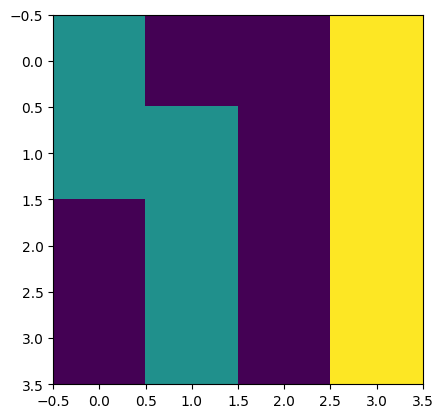

type(int_connected_objects_count_final):  <class 'int'>
int_connected_objects_count_final:  2


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def func_count_connected_objects(nda_2DXX_imgPredIn, 
                                 nda_2DXX_imgMaskIn
                                ):
    
    
    
    def func_dfs(row, 
                 col, 
                 int_asignacion=0
                ):
        """
        Funcion que busca iterativamente
        MODIFICA LA MATRIZ nda_2DXX_imgPredIn2 y nda_2DXX_imgPred_asignacion
        """
        if (row < 0 or 
            row >= int_total_rows or 
            col < 0 or 
            col >= int_total_cols or
            nda_2DXX_imgPredIn2[row, col] == 0
           ):
            return
        
        #Despues del if solo pasan las que tienen valor 1 de elemento
        #nonlocal int_area_superficie
        #int_area_superficie=int_area_superficie+1
        nda_2DXX_imgPredIn2[row, col] = 0  # SE MARCA COMO VISITADA. Mark the current cell as visited
        nda_2DXX_imgPred_asignacion[row, col] = int_asignacion  # Crear nueva matriz
        
        # Explore neighbors in 4 directions
        func_dfs(row + 1, col, int_asignacion)
        func_dfs(row - 1, col, int_asignacion)
        func_dfs(row, col + 1, int_asignacion)
        func_dfs(row, col - 1, int_asignacion)
        
        #Diagonales
        func_dfs(row + 1, col + 1, int_asignacion)  # Diagonal bottom-right
        func_dfs(row + 1, col - 1, int_asignacion)  # Diagonal bottom-left
        func_dfs(row - 1, col + 1, int_asignacion)  # Diagonal top-right
        func_dfs(row - 1, col - 1, int_asignacion)  # Diagonal top-left
        
        #print("hola")
    
    #AQUI HAY QUE VER QUE ATRAVIESAN DE ARRIBA A ABAJO

    
    def func_conectividadPrimeraUltimaFila(nda_2DXX_imgPredIn):
        """
        Revisa si el mismo valor esta en la primera y ultima fila y como los elementos son continuos 
        solo deja los elementos que recorren la discontinuidad de lado a lado los demas quedan en 0
        """
        nda_2DXX_imgPredOut=nda_2DXX_imgPredIn.copy()
        lst_int_nda2DXX_array=np.unique(nda_2DXX_imgPredOut)
        lst_int_nda2DXX_array = lst_int_nda2DXX_array[lst_int_nda2DXX_array != 0]#Saco 0 que es fondo

        for lst_int_nda2DXX_array_i in lst_int_nda2DXX_array:
            nda_2DXX_imgPred_aux=nda_2DXX_imgPredOut.copy()

            nda_2DXX_imgPred_aux[nda_2DXX_imgPred_aux!=lst_int_nda2DXX_array_i]=0#Se analiza solo el valor actual. Todos los valores distintos seran cero

            # Check if there is at least one 1 in the first row
            has_value_in_first_row = np.any(nda_2DXX_imgPred_aux[0] == lst_int_nda2DXX_array_i)#Que el valor actual este en la primera fila

            # Check if there is at least one 1 in the last row
            has_value_in_last_row = np.any(nda_2DXX_imgPred_aux[-1] == lst_int_nda2DXX_array_i)#Que el valor actual este en la ultima fila

            # Check if both conditions are satisfied simultaneously
            both_conditions_satisfied = has_value_in_first_row and has_value_in_last_row

            #print(both_conditions_satisfied)
            if(both_conditions_satisfied==False):#Si no esta el elemento en la primera y ultima fila se borra el elemento y se deja en 0
                nda_2DXX_imgPredOut[nda_2DXX_imgPredOut==lst_int_nda2DXX_array_i]=0

        return(nda_2DXX_imgPredOut)
    
    
    def func_contarCantidadElementos(nda_2DXX_imgPred_asignacionIn,
                                nda_2DXX_imgMaskInIn):
        """
        Cuenta cuantos elementos hay
        En una lista obtiene los distintos valores de nda_2DXX_imgPred_asignacionIn
        Solo valen los elementos distintos cuando estan presentes en la clase objeto en la mascara
        """
        nda_2DXX_imgPred_asignacionIn2=nda_2DXX_imgPred_asignacionIn.copy()
        nda_2DXX_imgMaskInIn2=nda_2DXX_imgMaskInIn.copy()
        
        lst_nda_2DXX_imgPred_asignacionIn2_unique=np.unique(nda_2DXX_imgPred_asignacionIn2)
        lst_nda_2DXX_imgPred_asignacionIn2_unique = lst_nda_2DXX_imgPred_asignacionIn2_unique[lst_nda_2DXX_imgPred_asignacionIn2_unique != 0]

        nda_2DXX_imgMaskInIn2_onesOnly=(nda_2DXX_imgMaskInIn2==1)#Solo vale cuando la clase objeto esta presente en la mascara
        #print("nda_2DXX_imgMaskInIn2_onesOnly: ")
        #print(nda_2DXX_imgMaskInIn2_onesOnly)
        #print("################")
        #print("################")
        #print("################")
        for lst_nda_2DXX_imgPred_asignacionIn2_unique_i in lst_nda_2DXX_imgPred_asignacionIn2_unique:

            #print("lst_nda_2DXX_imgPred_asignacionIn2_unique_i: ",lst_nda_2DXX_imgPred_asignacionIn2_unique_i)
            nda_2DXX_imgPred_asignacionIn2_currentAsignacion=(nda_2DXX_imgPred_asignacionIn2==lst_nda_2DXX_imgPred_asignacionIn2_unique_i)
            #print("nda_2DXX_imgPred_asignacionIn2_currentAsignacion: ")
            #print(nda_2DXX_imgPred_asignacionIn2_currentAsignacion)

            #out=(matrix_aux_Out==matrix_aux_Mask)
            nda_2DXX_imgPred_intersec_currentAsignacion_mask_onesOnly = np.logical_and(nda_2DXX_imgPred_asignacionIn2_currentAsignacion, nda_2DXX_imgMaskInIn2_onesOnly)
            #print("nda_2DXX_imgPred_intersec_currentAsignacion_mask_onesOnly: \n")
            #print(nda_2DXX_imgPred_intersec_currentAsignacion_mask_onesOnly)

            boo_at_least_one_true = np.any(nda_2DXX_imgPred_intersec_currentAsignacion_mask_onesOnly)
            #print("boo_at_least_one_true: \n", 
            #      boo_at_least_one_true)

            if(boo_at_least_one_true==False):#Si no hay ningun pixel del objeto encima de la clase objeto de la mascara se deja todo ese objeto en 0
                nda_2DXX_imgPred_asignacionIn2[nda_2DXX_imgPred_asignacionIn2==lst_nda_2DXX_imgPred_asignacionIn2_unique_i]=0

            #print("binary_matrix2:")
            #print(binary_matrix2)
            #0/0
            
        lst_cantidadObjetosFinal=np.unique(nda_2DXX_imgPred_asignacionIn2)
        lst_cantidadObjetosFinal = lst_cantidadObjetosFinal[lst_cantidadObjetosFinal != 0]#Saco 0 que es fondo
        int_cantidadObjetosFinal=len(np.unique(lst_cantidadObjetosFinal))
        #print("int_cantidadObjetosFinal: ", int_cantidadObjetosFinal)
        #print("nda_2DXX_imgPred_asignacionIn2 \n: ", nda_2DXX_imgPred_asignacionIn2)
        return(int_cantidadObjetosFinal,
               nda_2DXX_imgPred_asignacionIn2)
    
    
    
    
    
    def func_obtenerSumMedianMean(nda_2DXX_imgPredIn):
        """
        Le pasan una matriz y cuenta cuantos elementos hay de cada valor que es como el area si los elementos representan pixeles
        """
        nda_2DXX_imgPred=nda_2DXX_imgPredIn.copy()
        lst_str_nda_2DXX_imgPred=np.unique(nda_2DXX_imgPred)
        lst_str_nda_2DXX_imgPred = lst_str_nda_2DXX_imgPred[lst_str_nda_2DXX_imgPred != 0]#Saco 0 que es fondo

        lst_area=[]
        for lst_str_nda_2DXX_imgPred_i in lst_str_nda_2DXX_imgPred:

            nda_2DXX_imgPred_aux=nda_2DXX_imgPred.copy()

            nda_2DXX_imgPred_aux[nda_2DXX_imgPred_aux!=lst_str_nda_2DXX_imgPred_i]=0#Se analiza solo el valor actual
            nda_2DXX_imgPred_aux[nda_2DXX_imgPred_aux==lst_str_nda_2DXX_imgPred_i]=1#Los valores del unique actual se cambian por uno

            int_iteracion_area=np.sum(nda_2DXX_imgPred_aux)
            lst_area.append(int_iteracion_area)

        int_Sum=np.sum(lst_area)
        int_Mean=np.mean(lst_area)
        int_Median=np.median(lst_area)

        #print("lst_area: ", lst_area)
        #print("int_Sum: ", int_Sum)
        #print("int_Mean: ", int_Mean)
        #print("int_Median: ", int_Median)

        return(int_Sum, int_Mean, int_Median)

    ##########################
    ##########################
    ##########################
    nda_2DXX_imgPredIn2=nda_2DXX_imgPredIn.copy()
    nda_2DXX_imgMaskIn2=nda_2DXX_imgMaskIn.copy()
    lst_areasSuperficie=[]
    
    #int_total_rows, int_total_cols = nda_2DXX_imgPred.shape
    
    nda_2DXX_imgPred_asignacion=np.zeros(shape=(nda_2DXX_imgPredIn2.shape[0], 
                                                nda_2DXX_imgPredIn2.shape[1]), dtype=int)  
    
    if (nda_2DXX_imgPredIn2.size == 0 or 
        nda_2DXX_imgPredIn2.ndim != 2
       ):
        return 0
    

    #int_area_superficie2=0
        
    int_total_rows, int_total_cols = nda_2DXX_imgPredIn2.shape
    int_connected_objects_count = 0 #Se necesita para crear nueva matriz

    for i in range(int_total_rows):
        for j in range(int_total_cols):            
            if nda_2DXX_imgPredIn2[i, j] == 1:
                #int_area_superficie=0
                int_connected_objects_count += 1
               
                func_dfs(row=i, 
                         col=j, 
                         int_asignacion=int_connected_objects_count
                        )
                
                #print("corregir superficie")
                #print("int_area_superficie: ", int_area_superficie)
                #lst_areasSuperficie.append(int_area_superficie)
    
    #int_sum = np.sum(lst_areasSuperficie)
    #flo_mean = np.mean(lst_areasSuperficie)
    #flo_median = np.median(lst_areasSuperficie)
    #print("int_sum: ", int_sum)
    #print("flo_mean: ", flo_mean)
    #print("flo_median: ", flo_median)
    
    nda_2DXX_imgPred_asignacion=func_conectividadPrimeraUltimaFila(nda_2DXX_imgPred_asignacion)#Si no estan conectados de lado a lado lo borra
    
    int_connected_objects_count_final, nda_2DXX_imgPred_asignacion=func_contarCantidadElementos(nda_2DXX_imgPred_asignacionIn=nda_2DXX_imgPred_asignacion,
                                                                                                nda_2DXX_imgMaskInIn=nda_2DXX_imgMaskIn2
                                                                                                )

    
    int_Sum, int_Mean, int_Median =func_obtenerSumMedianMean(nda_2DXX_imgPred_asignacion)

    print("int_Sum: ", int_Sum)
    print("int_Mean: ", int_Mean)
    print("int_Median: ", int_Median)
    
    plt.imshow(nda_2DXX_imgPred_asignacion)
    plt.show()
    print("type(int_connected_objects_count_final): ", type(int_connected_objects_count_final))
    print("int_connected_objects_count_final: ", int_connected_objects_count_final)
    return (int_connected_objects_count_final, nda_2DXX_imgPred_asignacion)

# Example usage with a 2D NumPy array
nda_2DXX_imgMask = np.array([
    [1, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 0, 1, 1]
])



nda_2DXX_imgPred = np.array([
    [1, 0, 0, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 1],
    [0, 1, 0, 1]
])
#binary_matrix2=np.zeros(shape=(binary_matrix.shape[0], binary_matrix.shape[1]), dtype=int)  

result = func_count_connected_objects(nda_2DXX_imgPred, 
                                      nda_2DXX_imgMask)
#print("va a imprimir resutlt")
#print("Number of connected objects: \n", result[0])
#print("nda_2DXX_imgPred_asignacion: \n", result[1])


In [25]:
import sys

# Get the current recursion limit
recursion_limit = sys.getrecursionlimit()

print("Current recursion limit:", recursion_limit)

Current recursion limit: 3000


In [14]:
nda_2DXX_imgPred = np.array([
    [1, 0, 1, 3],
    [1, 1, 3, 0],
    [4, 1, 3, 2],
    [0, 1, 3, 2]
])



In [22]:
def func_calcularSumMedianMean(nda_2DXX_imgPredIn):
   
    nda_2DXX_imgPred=nda_2DXX_imgPredIn.copy()
    lst_str_nda_2DXX_imgPred=np.unique(nda_2DXX_imgPred)
    lst_str_nda_2DXX_imgPred = lst_str_nda_2DXX_imgPred[lst_str_nda_2DXX_imgPred != 0]#Saco 0 que es fondo

    lst_area=[]
    for lst_str_nda_2DXX_imgPred_i in lst_str_nda_2DXX_imgPred:

        nda_2DXX_imgPred_aux=nda_2DXX_imgPred.copy()

        nda_2DXX_imgPred_aux[nda_2DXX_imgPred_aux!=lst_str_nda_2DXX_imgPred_i]=0#Se analiza solo el valor actual
        nda_2DXX_imgPred_aux[nda_2DXX_imgPred_aux==lst_str_nda_2DXX_imgPred_i]=1#Los valores del unique actual se cambian por uno

        int_iteracion_area=np.sum(nda_2DXX_imgPred_aux)
        lst_area.append(int_iteracion_area)

    int_Sum=np.sum(lst_area)
    int_Mean=np.mean(lst_area)
    int_Median=np.median(lst_area)

    print("lst_area: ", lst_area)
    print("int_Sum: ", int_Sum)
    print("int_Mean: ", int_Mean)
    print("int_Median: ", int_Median)
    
    return(int_Sum, int_Mean, int_Median)
func_calcularSumMedianMean(nda_2DXX_imgPred)

lst_area:  [6, 2, 4, 1]
int_Sum:  13
int_Mean:  3.25
int_Median:  3.0


(13, 3.25, 3.0)

In [13]:
def func_conectividadPrimeraUltimaFila(nda_2DXX_imgPredIn):
    """
    Revisa si el mismo valor esta en la primera y ultima fila y como los elementos son continuos solo deja los elementos que recorren la discontinuidad de lado a lado
    """
    nda_2DXX_imgPred=nda_2DXX_imgPredIn.copy()
    lst_int_nda2DXX_array=np.unique(nda_2DXX_imgPred)
    lst_int_nda2DXX_array = lst_int_nda2DXX_array[lst_int_nda2DXX_array != 0]#Saco 0 que es fondo

    for lst_int_nda2DXX_array_i in lst_int_nda2DXX_array:
        nda_2DXX_imgPred_aux=nda_2DXX_imgPred.copy()

        nda_2DXX_imgPred_aux[nda_2DXX_imgPred_aux!=lst_int_nda2DXX_array_i]=0#Se analiza solo el valor actual

        # Check if there is at least one 1 in the first row
        has_value_in_first_row = np.any(nda_2DXX_imgPred_aux[0] == lst_int_nda2DXX_array_i)#Que el valor actual este en la primera fila

        # Check if there is at least one 1 in the last row
        has_value_in_last_row = np.any(nda_2DXX_imgPred_aux[-1] == lst_int_nda2DXX_array_i)#Que el valor actual este en la ultima fila

        # Check if both conditions are satisfied simultaneously
        both_conditions_satisfied = has_value_in_first_row and has_value_in_last_row

        #print(both_conditions_satisfied)
        if(both_conditions_satisfied==False):#Si no esta el elemento en la primera y ultima fila se borra el elemento y se deja en 0
            nda_2DXX_imgPred[nda_2DXX_imgPred==lst_int_nda2DXX_array_i]=0

    return(both_conditions_satisfied, nda_2DXX_imgPred)

func_conectividadPrimeraUltimaFila(nda_2DXX_imgPred)

(True,
 array([[1, 0, 1, 0],
        [1, 1, 0, 0],
        [0, 1, 0, 1],
        [0, 1, 0, 1]]))

In [ ]:
0/0

In [ ]:
import numpy as np
def count_connected_objects(matrix):
    if not matrix or not matrix[0]:
        return 0

    #r=0
    def dfs(row, col):
        """
        Cuando la invoacan trata de marcar todos los pixeles conectados con 0 para que no se vuelvan a considerar todo este objeto
        Antes de llamar a esta funcion se suma uno al contador de objetos encontrados connected_objects_count
        Ojo que esta funcion es llamada solo cuando se identifica un pixel de la clase objeto  matrix[row][col]=1
        """
        if row < 0 or row >= rows or col < 0 or col >= cols or matrix[row][col] == 0:
            return
        
        matrix[row][col] = 0  # Mark the current cell as visited

        # Explore neighbors in 4 directions
        dfs(row + 1, col)#Revisa fila de abajo
        print("Paso dfs(row + 1, col)")
        if False:
            dfs(row - 1, col)
            print("Paso dfs(row - 1, col)")
            dfs(row, col + 1)
            print("Paso dfs(row, col + 1)")
            dfs(row, col - 1)
            print("Paso dfs(row, col - 1)")
            #0/0
            #print("hola")
            dfs(row + 1, col + 1)
            dfs(row + 1, col - 1)
            dfs(row - 1, col + 1)
            dfs(row - 1, col - 1)

    rows = len(matrix)
    cols = len(matrix[0])
    connected_objects_count = 0

    for i in range(rows):
        
        for j in range(cols):
            print("i=",i," ", "j=", j, " ", "matrix[i][j]: ", matrix[i][j])
            if matrix[i][j] == 1:
                connected_objects_count += 1
                dfs(i, j)

    return connected_objects_count

# Example usage:
binary_matrix = [
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 0, 0, 1]
]

#binary_matrix = np.array(binary_matrix)

#binary_matrix2=np.zeros(shape=(binary_matrix.shape[0], binary_matrix.shape[1]))  
result = count_connected_objects(binary_matrix)
print("Number of connected objects:", result)


In [ ]:
import numpy as np

def count_connected_objects(matrix, maskIn):
    matrix_aux=matrix.copy()
    binary_matrix2=np.zeros(shape=(binary_matrix.shape[0], binary_matrix.shape[1]), dtype=int)  
    
    if matrix_aux.size == 0 or matrix_aux.ndim != 2:
        return 0

    def dfs(row, col, asignacion=0):
        if row < 0 or row >= rows or col < 0 or col >= cols or matrix_aux[row, col] == 0:
            return
        
        matrix_aux[row, col] = 0  # Mark the current cell as visited
        binary_matrix2[row, col] = asignacion  # Mark the current cell as visited
        
        # Explore neighbors in 4 directions
        dfs(row + 1, col, asignacion)
        dfs(row - 1, col, asignacion)
        dfs(row, col + 1, asignacion)
        dfs(row, col - 1, asignacion)

    rows, cols = matrix_aux.shape
    connected_objects_count = 0

    for i in range(rows):
        for j in range(cols):
            if matrix_aux[i, j] == 1:
                connected_objects_count += 1
                dfs(i, j, connected_objects_count)
                
    def contarCantidadElementos(binary_matrix2In):
        lst_binary_matrix2=np.unique(binary_matrix2In)
        lst_binary_matrix2 = lst_binary_matrix2[lst_binary_matrix2 != 0]

        matrix_aux_Mask=(maskIn==1)
        print("matrix_aux_Mask: ")
        print(matrix_aux_Mask)
        print("################")
        print("################")
        print("################")
        for lst_binary_matrix2_i in lst_binary_matrix2:

            print("lst_binary_matrix2_i: ",lst_binary_matrix2_i)
            matrix_aux_Out=binary_matrix2==lst_binary_matrix2_i
            print("matrix_aux_Out: ")
            print(matrix_aux_Out)



            #out=(matrix_aux_Out==matrix_aux_Mask)
            out = np.logical_and(matrix_aux_Out, matrix_aux_Mask)
            print("out: ")
            print(out)

            at_least_one_true = np.any(out)
            print("at_least_one_true: ", at_least_one_true)

            if(at_least_one_true==False):
                binary_matrix2[binary_matrix2==lst_binary_matrix2_i]=0

            print("binary_matrix2:")
            print(binary_matrix2)
            #0/0
    
    contarCantidadElementos(binary_matrix2)
        

    return (connected_objects_count, binary_matrix2)

# Example usage with a 2D NumPy array
mask = np.array([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 0, 1, 1]
])



binary_matrix = np.array([
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 0, 0, 1]
])
#binary_matrix2=np.zeros(shape=(binary_matrix.shape[0], binary_matrix.shape[1]), dtype=int)  

result = count_connected_objects(binary_matrix, mask)
print("va a imprimir resutlt")
print("Number of connected objects:", result)


In [ ]:
binary_matrix2=result[1]
binary_matrix2

In [ ]:
binary_matrix

In [ ]:
lst_binary_matrix2=np.unique(binary_matrix2)
lst_binary_matrix2 = lst_binary_matrix2[lst_binary_matrix2 != 0]

matrix_aux_Mask=(mask==1)
print("matrix_aux_Mask: ")
print(matrix_aux_Mask)
print("################")
print("################")
print("################")
for lst_binary_matrix2_i in lst_binary_matrix2:
    
    print("lst_binary_matrix2_i: ",lst_binary_matrix2_i)
    matrix_aux_Out=binary_matrix2==lst_binary_matrix2_i
    print("matrix_aux_Out: ")
    print(matrix_aux_Out)

    
    
    #out=(matrix_aux_Out==matrix_aux_Mask)
    out = np.logical_and(matrix_aux_Out, matrix_aux_Mask)
    print("out: ")
    print(out)
    
    at_least_one_true = np.any(out)
    print("at_least_one_true: ", at_least_one_true)
    
    if(at_least_one_true==False):
        binary_matrix2[binary_matrix2==lst_binary_matrix2_i]=0
    
    print("binary_matrix2:")
    print(binary_matrix2)
    #0/0
    
    
lst_cantidadObjetosFinal=np.unique(binary_matrix2)
lst_cantidadObjetosFinal = lst_cantidadObjetosFinal[lst_cantidadObjetosFinal != 0]
int_cantidadObjetosFinal=len(np.unique(lst_cantidadObjetosFinal))
print("int_cantidadObjetosFinal: ", int_cantidadObjetosFinal)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
#image = cv2.imread("mariposa.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.cvtColor(cv2.imread(r"mariposawiki3.jpg"), cv2.COLOR_BGR2RGB)

# Define the Laplacian kernel
kernel = np.array([[0, -1, 0], 
                   [-1, 4, -1], 
                   [0, -1, 0]], dtype=np.float32)

# Apply convolution
result = cv2.filter2D(image, -1, kernel)
result2 = cv2.bitwise_not(result)
plt.imshow(image)
plt.show()
plt.imshow(result)
plt.show()
plt.imshow(result2)
plt.show()

cv2.imwrite("mariposaconvoluted2.png", 
            #nda_2DXX_imgMask*255
            result2
            )

In [ ]:
import tensorflow as tf
m = tf.keras.metrics.MeanIoU(num_classes=2, ignore_class=3)
m.update_state([0, 0, 1, 1], [0, 0, 1, 1])
m.result().numpy()
